In [1]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
(x, N1) = librosa.load("sample.wav", sr=None)

In [2]:
x.size

97304

In [3]:
N2 = 16000 
print(N1, N2) #частоты

22050 16000


In [5]:
N = N1*N2
N

352800000

In [6]:
x_covered = np.array([])#растяжение, но дополняем не нулями, а растягиваем значение на N2
temp = [i for i in range(x.size)]
for i in range(x.size):
    temp[i] = np.repeat(x[i], N2, axis=0)
x_covered = np.concatenate(temp)
x_covered.size

1556864000

In [7]:
#b, a = scipy.signal.butter(3, 0.46) #не до
#y_covered = scipy.signal.lfilter(b, a, x_covered)

In [7]:
i = 0 #прореживание
y = np.array([])
while (i * N1 < x_covered.size):
    y = np.append(y, x_covered[i * N1])
    i += 1

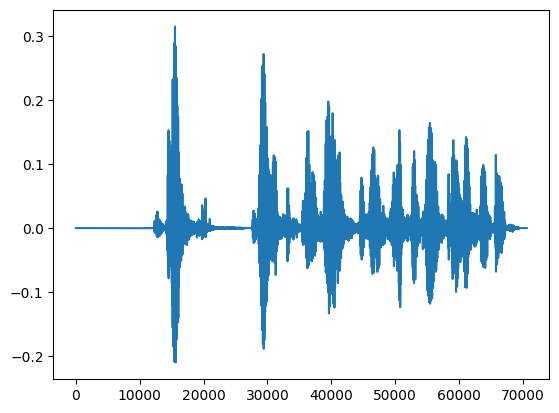

In [8]:
plt.plot(y)

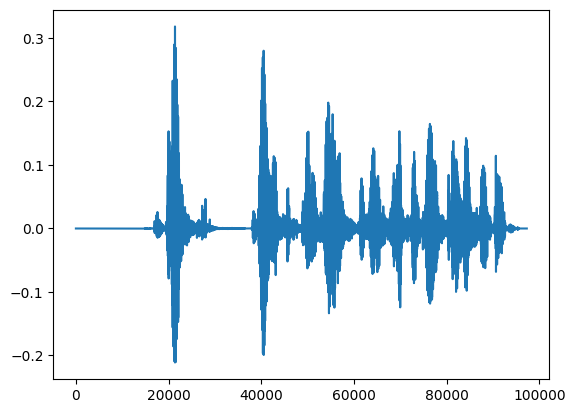

In [9]:
plt.plot(x)

In [10]:
import soundfile as sf
sf.write('out.wav', y, N2, subtype='PCM_24')